In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_json("data.json")

In [3]:
dataset.shape

(9011, 7)

In [4]:
dataset.head()

,questionType,asin,answerTime,unixTime,question,answerType,answer
0,yes/no,B00004U9JP,"Jun 27, 2014",1.403852e+09,I have a 9 year old Badger 1 that needs replac...,?,I replaced my old one with this without a hitch.
1,open-ended,B00004U9JP,"Apr 28, 2014",1.398668e+09,model number,NaN,This may help InSinkErator Model BADGER-1: Bad...
2,yes/no,B00004U9JP,"Aug 25, 2014",1.408950e+09,can I replace Badger 1 1/3 with a Badger 5 1/2...,?,Plumbing connections will vary with different ...
3,yes/no,B00004U9JP,"Nov 3, 2014",1.415002e+09,Does this come with power cord and dishwasher ...,?,It does not come with a power cord. It does co...
4,open-ended,B00004U9JP,"Jun 21, 2014",1.403334e+09,loud noise inside when turned on. sounds like ...,NaN,Check if you dropped something inside.Usually ...


In [5]:
dataset['answerType'].isnull().sum()

4318

In [6]:
dataset['answerType'].value_counts()

?    2422
Y    1655
N     616
Name: answerType, dtype: int64

In [7]:
dataset.drop(['answerType', 'asin', 'unixTime', 'answerTime'], axis=1, inplace=True)

In [8]:
dataset.head()

,questionType,question,answer
0,yes/no,I have a 9 year old Badger 1 that needs replac...,I replaced my old one with this without a hitch.
1,open-ended,model number,This may help InSinkErator Model BADGER-1: Bad...
2,yes/no,can I replace Badger 1 1/3 with a Badger 5 1/2...,Plumbing connections will vary with different ...
3,yes/no,Does this come with power cord and dishwasher ...,It does not come with a power cord. It does co...
4,open-ended,loud noise inside when turned on. sounds like ...,Check if you dropped something inside.Usually ...


In [9]:
dataset['questionType'].isnull().sum()

0

In [10]:
dataset['questionType'].value_counts()

yes/no        4693
open-ended    4318
Name: questionType, dtype: int64

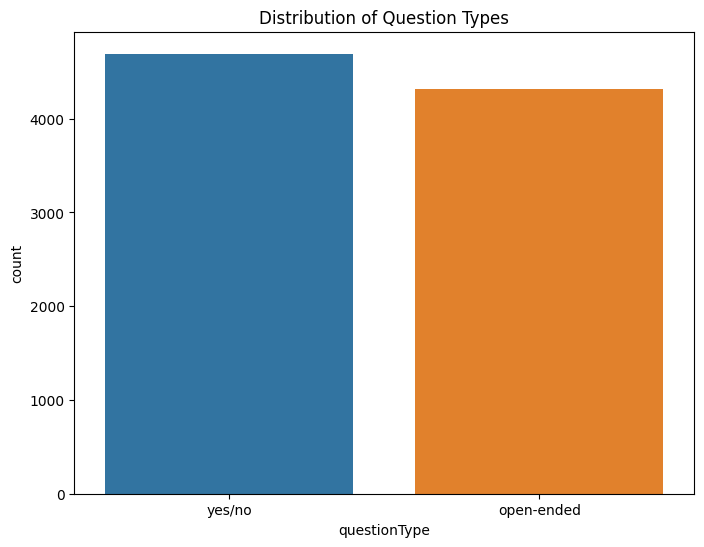

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='questionType', data=dataset)
plt.title('Distribution of Question Types')
plt.show()

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questionType  9011 non-null   object
 1   question      9011 non-null   object
 2   answer        9011 non-null   object
dtypes: object(3)
memory usage: 211.3+ KB


In [13]:
dataset.duplicated().sum()

143

In [14]:
dataset.drop_duplicates(inplace=True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8868 entries, 0 to 9010
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questionType  8868 non-null   object
 1   question      8868 non-null   object
 2   answer        8868 non-null   object
dtypes: object(3)
memory usage: 277.1+ KB


In [18]:
dataset = dataset.iloc[:, 1:]

In [19]:
dataset.head()

,question,answer
0,I have a 9 year old Badger 1 that needs replac...,I replaced my old one with this without a hitch.
1,model number,This may help InSinkErator Model BADGER-1: Bad...
2,can I replace Badger 1 1/3 with a Badger 5 1/2...,Plumbing connections will vary with different ...
3,Does this come with power cord and dishwasher ...,It does not come with a power cord. It does co...
4,loud noise inside when turned on. sounds like ...,Check if you dropped something inside.Usually ...


In [20]:
dataset.to_csv("clean_QA.csv", index=False)